In [1]:
import os
import pandas as pd
import numpy as np
import xgboost
import plotly.graph_objs as go
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from tensorflow import keras
from xgboost import plot_importance
from plotly.offline import plot
from plotly.offline import init_notebook_mode

init_notebook_mode(connected = True)


In [2]:
os.getcwd()

'C:\\Users\\jmp08\\Desktop\\Data\\Competition\\Astro\\Astro'

In [3]:
train = pd.read_csv("./RawData/train.csv")
train = train.drop(["id"], axis = "columns")
train = train[(train.loc[:, ["u", "g", "r", "i", "z", "dered_u", "dered_g", "dered_r", "dered_i", "dered_z"]] > 0).all(axis = 1)]

In [109]:
clf = IsolationForest(n_estimators = 100)
clf.fit(train)
pred = clf.predict(train)
train["anomaly"] = pred

train = train.loc[train["anomaly"] != -1]
train = train.drop("anomaly", axis = "columns")

C:\Users\jmp08\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning:

default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.

C:\Users\jmp08\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning:

behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.

C:\Users\jmp08\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning:

threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.



In [7]:
train.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,287992.000000,287992.000000,287992.000000,287992.000000,287992.000000,287992.000000,287992.000000,287992.000000,287992.000000,287992.000000,287992.000000,287992.000000,287992.000000,287992.000000,287992.000000,287992.000000,287992.000000,287992.000000,287992.000000
mean,19.747789,18.325076,17.647816,17.238235,17.003919,0.057417,19.556573,18.174385,17.543319,17.160685,16.946755,5.913088,5.771789,1.167366,1.167842,1.167017,1.167175,1.167587,1.157893
std,1.701191,1.364566,1.178682,1.068560,1.084479,0.342250,1.649601,1.336627,1.161869,1.061915,1.081153,8.277798,8.032253,0.104144,0.105321,0.103162,0.103628,0.104707,0.917556
min,2.265091,14.721545,13.128613,2.749176,11.056773,-86.618158,13.761670,13.829280,13.101670,12.078640,13.265250,1.000000,1.000000,1.000059,1.000012,1.000179,1.000109,1.000027,0.000000
25%,18.750497,17.509507,16.915306,16.560124,16.324408,0.000051,18.601468,17.389890,16.830005,16.493230,16.271752,1.000000,1.000000,1.087197,1.087574,1.086844,1.087079,1.087370,0.000000
50%,19.383985,18.113233,17.502351,17.127704,16.894395,0.052535,19.234450,17.998025,17.421215,17.065855,16.847080,2.000000,2.000000,1.176245,1.175702,1.176605,1.176461,1.175886,2.000000
75%,20.221875,18.816093,18.159580,17.779348,17.538264,0.095631,20.015730,18.647933,18.035810,17.684263,17.469632,4.000000,4.000000,1.216687,1.214527,1.218668,1.217773,1.215461,2.000000
max,58.360283,31.765897,65.362263,32.863412,40.799011,62.323343,29.672990,30.060960,26.572780,28.227670,27.969340,43.000000,41.000000,1.647386,1.659706,1.635451,1.641370,1.653493,2.000000


In [9]:
train.corr(method = "pearson")

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
u,1.000000,0.924250,0.818819,0.655541,0.514186,-0.030079,0.967304,0.897622,0.791707,0.630169,0.492436,0.261388,0.259918,0.074451,0.074155,0.074632,0.074557,0.074318,-0.382418
g,0.924250,1.000000,0.947068,0.823887,0.695431,-0.022672,0.911158,0.978796,0.927322,0.801600,0.677529,0.257400,0.254992,0.070268,0.069772,0.070659,0.070478,0.070034,-0.384142
r,0.818819,0.947068,1.000000,0.934249,0.847925,-0.027504,0.810727,0.935415,0.983926,0.919278,0.835222,0.250049,0.246775,0.070918,0.070347,0.071384,0.071166,0.070647,-0.404517
i,0.655541,0.823887,0.934249,1.000000,0.958299,-0.026971,0.654556,0.818959,0.929827,0.989129,0.950285,0.247390,0.243494,0.076921,0.076553,0.077172,0.077063,0.076753,-0.393087
z,0.514186,0.695431,0.847925,0.958299,1.000000,-0.025737,0.515556,0.695850,0.848791,0.954919,0.991073,0.234123,0.230036,0.075586,0.075331,0.075723,0.075670,0.075474,-0.378249
redshift,-0.030079,-0.022672,-0.027504,-0.026971,-0.025737,1.000000,-0.027785,-0.018776,-0.024423,-0.024421,-0.024477,-0.018339,-0.018361,-0.003869,-0.003799,-0.003933,-0.003902,-0.003835,0.124001
dered_u,0.967304,0.911158,0.810727,0.654556,0.515556,-0.027785,1.000000,0.928542,0.820652,0.657069,0.517079,0.252392,0.251276,0.069587,0.069329,0.069734,0.069675,0.069473,-0.360818
dered_g,0.897622,0.978796,0.935415,0.818959,0.695850,-0.018776,0.928542,1.000000,0.948439,0.823384,0.698179,0.245638,0.243586,0.064401,0.063932,0.064768,0.064598,0.064180,-0.358360
dered_r,0.791707,0.927322,0.983926,0.929827,0.848791,-0.024423,0.820652,0.948439,1.000000,0.936940,0.852393,0.240136,0.237133,0.066330,0.065786,0.066773,0.066566,0.066072,-0.383192
dered_i,0.630169,0.801600,0.919278,0.989129,0.954919,-0.024421,0.657069,0.823384,0.936940,1.000000,0.960324,0.237765,0.234144,0.072651,0.072301,0.072888,0.072785,0.072492,-0.373521


In [92]:
print(sum(train["class"] == 0), sum(train["class"] == 1), sum(train["class"] == 2))

KeyError: 'class'

In [4]:
target = train["class"]
train = train.drop("class", axis = "columns")

In [5]:
train["class"] = target
train, test = train_test_split(train, test_size = .2)

trainTarget = keras.utils.to_categorical(train["class"])
testTarget = keras.utils.to_categorical(test["class"])

trainFeature = train.drop(["class"], axis = "columns")
testFeature = test.drop(["class"], axis = "columns")

In [6]:
model = keras.Sequential()
model.add(keras.layers.Input(shape = trainFeature.shape[1]))
model.add(keras.layers.Dense(100, activation = "selu", kernel_initializer = "lecun_normal"))
model.add(keras.layers.Dense(100, activation = "selu", kernel_initializer = "lecun_normal"))
model.add(keras.layers.Dense(100, activation = "selu", kernel_initializer = "lecun_normal"))
model.add(keras.layers.Dense(100, activation = "selu", kernel_initializer = "lecun_normal"))
model.add(keras.layers.Dense(100, activation = "selu", kernel_initializer = "lecun_normal"))
model.add(keras.layers.Dense(100, activation = "selu", kernel_initializer = "lecun_normal"))
model.add(keras.layers.Dense(100, activation = "selu", kernel_initializer = "lecun_normal"))
model.add(keras.layers.Dense(3, activation = "softmax"))

Adam = keras.optimizers.Adam(learning_rate = 0.0005)

model.compile(optimizer = Adam, loss = "categorical_crossentropy", metrics = ["accuracy"])

class_weight = {0 : 14.,
                1 : 35.,
                2 : 10.}

early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss", min_delta = 0.0005, patience = 100, restore_best_weights = True)

history = model.fit(trainFeature, trainTarget, epochs = 3000, validation_split = 0.4, shuffle = True,
                    verbose = 1, batch_size = 128, callbacks = [early_stop], use_multiprocessing =True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 153589 samples, validate on 102393 samples
Epoch 1/3000
153589/153589 [==============================] - 10s 63us/sample - loss: 0.5865 - accuracy: 0.7617 - val_loss: 0.4227 - val_accuracy: 0.8359
Epoch 2/3000
153589/153589 [==============================] - 9s 58us/sample - loss: 0.3890 - accuracy: 0.8516 - val_loss: 0.3498 - val_accuracy: 0.8674
Epoch 3/3000
153589/153589 [==============================] - 9s 58us/sample - loss: 0.3399 - accuracy: 0.8701 - val_loss: 0.2917 - val_accuracy: 0.8888
Epoch 4/3000
153589/153589 [==============================] - 9s 57us/sample - loss: 0.3115 - accuracy: 0.8805 - val_loss: 0.3233 - val_accuracy: 0.8740
Epoch 5/3000
153589/153589 [==============================] - 9s 57us/sample - loss: 0.2982 - accuracy: 0.8846 - val_loss: 0.2715 - val_accuracy: 0.8920
Epoch 6/3000
153589/153589 [==============================] - 9s 56us/sample - loss: 0.2

In [39]:
result = model.predict(testFeature)

In [41]:
sum(np.argmax(result, axis = 1) == testTarget) / len(testTarget)

0.9272923307706732

In [16]:
pred = pd.read_csv("./RawData/test.csv")
submit = pd.read_csv("./RawData/sample_submission.csv")
result = model.predict(pred.drop("id", axis = "columns"))
submit["class"] = np.argmax(result, axis = 1)

In [17]:
submit["class"].value_counts()

2    40922
0    29984
1     9094
Name: class, dtype: int64

In [122]:
submit.to_csv("C:/Users/jmp08/Desktop/submit.csv", index = False, encoding = "utf-8-sig")

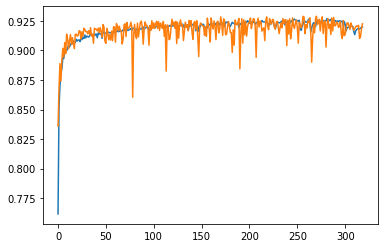

In [18]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

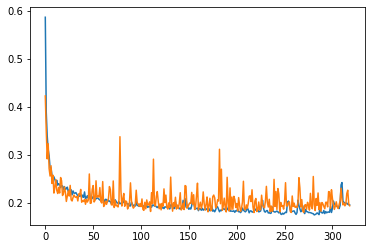

In [19]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [77]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform

train = pd.read_csv("./RawData/train.csv")
train = train.drop(["id"], axis = "columns")
train = train[(train.loc[:, ["u", "g", "r", "i", "z", "dered_u", "dered_g", "dered_r", "dered_i", "dered_z"]] > 0).all(axis = 1)]

In [21]:
train, valid = train_test_split(train, test_size = .3)

trainFeature = train.drop("class", axis = "columns")
trainTarget = train["class"]

validFeature = valid.drop("class", axis = "columns")
validTarget = valid["class"]

testFeature = test.drop("class", axis = "columns")
testTarget = test["class"]

In [33]:
tree = xgboost.XGBClassifier(objective = "softprob", n_estimators = 400, n_jobs = -1, learning_rate = 0.1, max_depth = 5)
tree.fit(trainFeature, trainTarget, eval_set = [(validFeature, validTarget)])


[0]	validation_0-merror:0.106869
[1]	validation_0-merror:0.106166
[2]	validation_0-merror:0.104213
[3]	validation_0-merror:0.104382
[4]	validation_0-merror:0.104082
[5]	validation_0-merror:0.104213
[6]	validation_0-merror:0.104004
[7]	validation_0-merror:0.103457
[8]	validation_0-merror:0.102858
[9]	validation_0-merror:0.102012
[10]	validation_0-merror:0.10196
[11]	validation_0-merror:0.101413
[12]	validation_0-merror:0.100566
[13]	validation_0-merror:0.100384
[14]	validation_0-merror:0.099928
[15]	validation_0-merror:0.099342
[16]	validation_0-merror:0.098795
[17]	validation_0-merror:0.098275
[18]	validation_0-merror:0.097663
[19]	validation_0-merror:0.097025
[20]	validation_0-merror:0.096777
[21]	validation_0-merror:0.096452
[22]	validation_0-merror:0.096308
[23]	validation_0-merror:0.095853
[24]	validation_0-merror:0.095319
[25]	validation_0-merror:0.094993
[26]	validation_0-merror:0.094837
[27]	validation_0-merror:0.094603
[28]	validation_0-merror:0.094173
[29]	validation_0-merror:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [34]:
result = tree.predict(testFeature)
sum(result == testTarget.reset_index(drop = True)) / len(testTarget)

0.9227920495030939

In [35]:
pred = pd.read_csv("./RawData/test.csv")
submit = pd.read_csv("./RawData/sample_submission.csv")
result = tree.predict(pred.drop("id", axis = "columns"))
submit["class"] = result

In [84]:
submit.to_csv("C:/Users/Family/Desktop/submit.csv", index = False, encoding = "utf-8-sig")

class
2        50027
0        29973
dtype: int64

In [36]:
submit["class"].value_counts()

2    41764
0    29967
1     8269
Name: class, dtype: int64